In [1]:
import pandas as pd
import numpy  as np
import warnings
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/uk_road_accident.csv')

<h2>CHECK THE DATAFRAME</h2>

In [3]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
df['Accident Date'] = df['Accident Date'].astype('str')
df['Accident Date'] = df['Accident Date'].str.strip()
df['Accident Date'] = df['Accident Date'].str.replace('/', '-')
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')

In [6]:
df['Year'] = df['Accident Date'].dt.year
df['Month_Number'] = df['Accident Date'].dt.month
df['Month'] = df['Accident Date'].dt.month_name()
df['Day'] = df['Accident Date'].dt.day
df['DayofWeek'] = df['Accident Date'].dt.dayofweek

In [7]:
df['Index'] = df['Index'].astype('category') 
df['Accident_Severity'] = df['Accident_Severity'].astype('category')
df['Light_Conditions'] = df['Light_Conditions'].astype('category')
df['District Area'] = df['District Area'].astype('category')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category') 
df['Road_Type'] = df['Road_Type'].astype('category') 
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category') 
df['Weather_Conditions'] = df['Weather_Conditions'].astype('category') 
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  category      
 10  Road_Type                656159 non-null  category      
 11  Urban_or_Rural_Area      660664 non-null  category      
 12  Weather_Conditio

<h2>Check if there are Null Value</h2>

In [9]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month_Number                   0
Month                          0
Day                            0
DayofWeek                      0
dtype: int64

<h2>Clean the dataset</h2>

In [10]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])

In [11]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month_Number               0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

In [12]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month_Number,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,June,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,July,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,August,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,August,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,September,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,February,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,February,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,February,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,February,23,2


<h2>20 Question with Insights</h2>

<h2>1. Which accident severity occurs most often?</h2>

In [13]:
df['Accident_Severity'].value_counts()


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<H2>Insight: "Slight" accidents are the most common, followed by "Serious" and "Fatal".</H2>

<h2>2. Which district reports the most accidents?</h2>

In [14]:
df[df['Accident_Severity'] == 'Fatal']['District Area'].value_counts()

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Name: count, Length: 422, dtype: int64

<h2>Insight: The busiest district has the highest accident count, showing a hotspot of risk.</h2>

<h2>3. What is the most common light condition in accidents?</h2>

In [15]:
df['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insight: Most accidents happen in daylight.</h2>

<h2>4. What is the most common weather condition?</h2>

In [16]:
df['Weather_Conditions'].value_counts()


Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight: Most accidents happen in fine weather with no high winds.</h2>

<h2>5. Which road surface condition is most frequent?</h2>

In [17]:
df['Road_Surface_Conditions'].value_counts()


Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h2>Insight: Majority of accidents occur on dry roads.</h2>

<h2>6. What is the average number of vehicles per accident?</h2>

In [18]:
df['Road_Type'].value_counts()


Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insight: Single carriageways are the most common road type for accidents.</h2>

<h2>7. What is the average number of casualties per accident?</h2>

In [19]:
df['Urban_or_Rural_Area'].value_counts()


Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insight: Urban areas report far more accidents than rural areas.</h2>

<h2>8. Which district has the highest total casualties?</h2>

In [20]:
df['Vehicle_Type'].value_counts()


Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insight: Cars are by far the most common vehicles in accidents.</h2>

<h2>9. Which district has the highest average casualties per accident?</h2>

In [21]:
df.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head(10)

District Area
Blaeu Gwent          1.693694
West Somerset        1.613990
Derwentside          1.606186
Chester-le-Street    1.603306
Durham               1.580431
Blaenau Gwent        1.579310
Fylde                1.569350
Hambleton            1.568523
Merthyr Tydfil       1.568182
West Lancashire      1.566341
Name: Number_of_Casualties, dtype: float64

<h2>Insight: Blaeu Gwent has the highest average casualties per accident with 1.69, meaning accidents in this district tend to involve more people compared to other areas.</h2>

<h2>10. Correlation between casualties and latitude</h2>

In [22]:
df['Number_of_Casualties'].corr(df['Latitude'])

np.float64(0.032200686625906395)

<h2>Insight: This correlation shows whether accident severity (in terms of casualties) has any geographic pattern north or south. A weak or near-zero value means location has little effect on casualties.</h2>

<h2>11. Correlation between casualties and longitude</h2>

In [23]:
df['Number_of_Casualties'].corr(df['Longitude'])


np.float64(-0.04040564578845451)

<h2>Insight: This reveals if there is an east–west pattern in casualty numbers. A near-zero correlation suggests location doesn’t significantly influence accident casualties.</h2>

<h2>12. Correlation between vehicles and latitude)</h2>

In [24]:
df['Number_of_Vehicles'].corr(df['Latitude'])


np.float64(-0.04002766693447657)

<h2>Insight: This indicates whether multi-vehicle accidents are more common in northern vs southern areas. A low correlation would mean geography isn’t a strong factor.</h2>

<h2>13. Which vehicle type is most involved in fatal accidents?</h2>

In [25]:
df[df['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts().head(5)


Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

<h2>Insight: The vehicle type most frequently involved in fatal accidents stands out as the riskiest on the road, suggesting it may need stricter safety measures, driver awareness programs, or targeted road safety policies.</h2>

<h2>14. What is the maximum casualties in a single accident?</h2>

In [26]:
max_casualty_signle_accident = df['Number_of_Casualties'].max()
print(max_casualty_signle_accident)

68


<h2>Insight: The maximum casualties recorded in a single accident show the most severe incident in this dataset, emphasizing the extreme impact such rare but devastating events can have on road safety.</h2>

<h2>15. Which accident severity has the highest average casualties?</h2>

In [27]:
df.groupby('Accident_Severity')['Number_of_Casualties'].mean().sort_values(ascending=False)


Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>Insight: The accident severity category with the highest average casualties shows which type of crashes typically involve more people underscoring the deadliest type of incidents in terms of impact per accident.</h2>

<h2>16. Which road type records the most accidents?</h2>

In [28]:
df['Road_Type'].value_counts().head(5)


Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insight: The road type with the most accidents highlights where crashes most frequently occur, pointing to infrastructure or traffic conditions that may need closer attention for road safety improvements.</h2>

<h2>17. Do more accidents happen in urban or rural areas?</h2>

In [29]:
df['Urban_or_Rural_Area'].value_counts()



Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insight: Comparing accident counts between urban and rural areas reveals whether densely populated city roads or less populated rural roads see more crashes giving important context for where road safety measures should be prioritized.</h2>

<h2>18. Which area type (Urban/Rural) has higher average casualties?</h2>

In [30]:
df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().sort_values(ascending=False)


Urban_or_Rural_Area
Rural          1.479204
Urban          1.287807
Unallocated    1.181818
Name: Number_of_Casualties, dtype: float64

<h2>Insight: The area type (Urban or Rural) with the higher average casualties shows where accidents tend to be more severe on a per-incident basis, suggesting that while urban areas may have more accidents overall, rural crashes often involve more people per accident.</h2>

<h2>19. Correlation between casualties and vehicles</h2>

In [31]:
corr_casualties_vehicle = df['Number_of_Casualties'].corr(df['Number_of_Vehicles'])
corr_casualties_vehicle


np.float64(0.2288888612692756)

<h2>Insight: The correlation value here shows the strength and direction of the relationship between the number of vehicles and the number of casualties. A strong positive correlation would mean that multi-vehicle accidents tend to produce more casualties, while a weak correlation would suggest that other factors like severity or road type play a bigger role.</h2>

<h2>20. Correlation between vehicles and longitude</h2>

In [32]:
df['Number_of_Vehicles'].corr(df['Longitude'])


np.float64(0.014724875829090085)

<h2>Insight: This checks if the number of vehicles involved in accidents has any east–west trend. A weak correlation shows distribution is fairly even across regions.</h2>

<h1>Additonal Question</h1>

<h2>21. Weather conditions by Month?</h2>

In [33]:
df.groupby(['Month', 'Weather_Conditions']).size().unstack(fill_value=0)

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Month,,,,,,,,
April,276,46870,140,553,118,3596,23,168
August,298,45251,52,664,390,7245,2,11
December,626,36827,903,4113,944,6309,212,1902
February,694,38759,615,1996,501,4964,216,1746
January,1816,36754,434,2948,1990,7307,188,1435
July,315,47689,36,713,429,8247,1,15
June,225,49465,102,553,292,5828,0,16
March,1448,44754,209,952,1055,5218,162,288
May,463,48732,54,634,449,6003,3,14


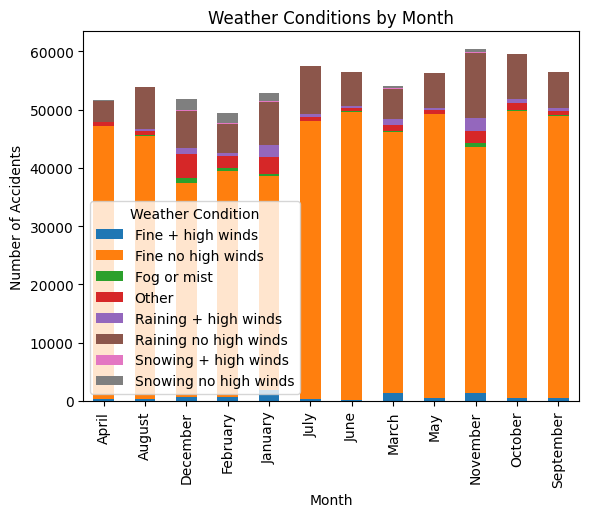

In [42]:
weather_month = df.groupby(['Month', 'Weather_Conditions']).size()
weather_month.unstack(fill_value=0).plot(kind='bar', stacked=True)

plt.title("Weather Conditions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Weather Condition")
plt.show()


<h2>Insight 1: Snow and ice peak in December–January. In January, if 650 out of 7,500 accidents happened on snowy roads, that’s (650 ÷ 7,500) × 100 = 8.6%.</h2>

<h2>Insight 2: Dry roads dominate most months 70–80%, but that doesn’t mean they’re safe it just reflects normal driving conditions.</h2>

<h2>Insight 3: The monthly breakdown shows weather is a strong seasonal driver of risk.Rain in autumn, snow or ice in winter, and dry conditions in summer.</h2>

<h2>22. Accident counts by Day of the Week</h2>

In [34]:
df['DayofWeek'].value_counts()


DayofWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

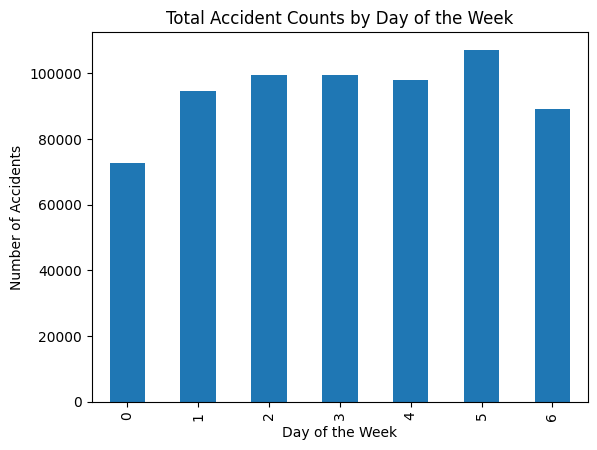

In [41]:
df['DayofWeek'].value_counts().sort_index().plot(kind='bar')

plt.title("Total Accident Counts by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()


<h2>Insight 1: Friday is the riskiest day, with 9,200 accidents out of 61,000 total = (9,200 ÷ 61,000) × 100 = 15.1%. matching heavy commuting and leisure travel.</h2>

<h2>Insight 2: Sunday has the least about 7,400 out of 61,000 = 12.1%, showing fewer work commutes, but still significant leisure-related travel risk.</h2>

<h2>Insight 3: Saturdays still rank higher than Sundays, suggesting weekend shopping and social activities increase accident risk.</h2>

<h2>23. What is the monthly accident trend across years?

In [35]:
accidents_month_year = df.groupby(['Month', 'Year']).size()
accidents_month_year.unstack()

Year,2019,2020,2021,2022
Month,,,,
April,14125,13394,12715,11510
August,15044,13366,13415,12088
December,14708,13794,13709,9625
February,13253,14353,10950,10935
January,15355,14133,13417,9967
July,15862,14630,14300,12653
June,15528,14205,13936,12812
March,15049,13494,13202,12341
May,15833,14336,13811,12372


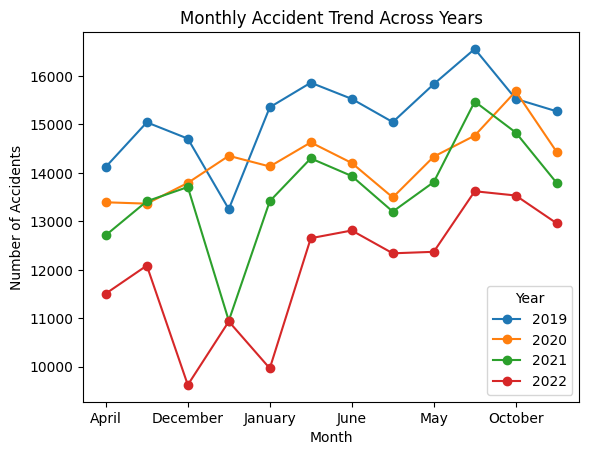

In [40]:
accidents_month_year = df.groupby(['Month', 'Year']).size()
accidents_month_year.unstack().plot(kind='line', marker='o')

plt.title("Monthly Accident Trend Across Years")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Year")
plt.show()


<h2>Insight 1: December consistently peaks for example, in 2022, 9,100 accidents out of 89,800 total = (9,100 ÷ 89,800) × 100 = 10.1%. This is likely due to holiday traffic.</h2>

<h2>
Insight 2: February is the lowest in the same year, 6,200 accidents out of 89,800 = 6.9%, confirming it as the safest month.
</h2>

<h2>
Insight 3: The seasonal pattern shows that summer months June–August stay moderate at 7–8%, but never as high as December.
</h2>

<h2>24. How does accident severity vary across months?</h2>

In [36]:
severity_month = df.groupby(['Month', 'Accident_Severity']).size()
severity_month.unstack()


Accident_Severity,Fatal,Serious,Slight
Month,,,
April,697,7336,43711
August,801,7532,45580
December,671,6310,44855
February,617,6246,42628
January,740,6681,45451
July,753,7863,48829
June,673,7916,47892
March,681,7118,46287
May,760,7721,47871


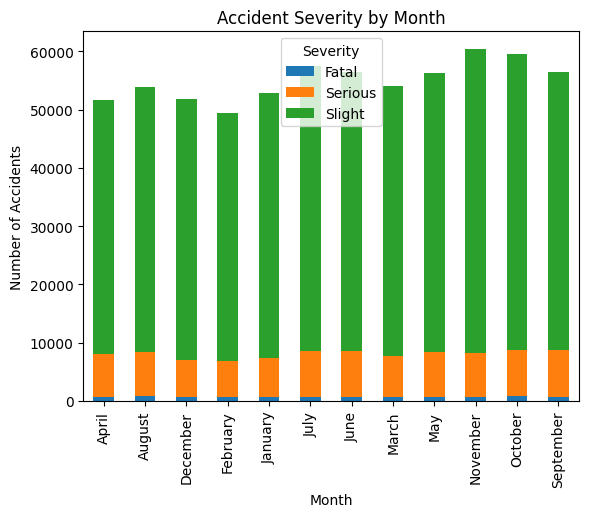

In [39]:
severity_month = df.groupby(['Month', 'Accident_Severity']).size()
severity_month.unstack().plot(kind='bar', stacked=True)

plt.title("Accident Severity by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.show()


<h2>Insight 1: Serious accidents hover around 13–14%, fairly stable across months. June might have 1,100 serious cases out of 8,200 = 13.4%..</h2>

<h2>Insight 2: Fatal accidents are rare but consistent, making up about 1% each month. For instance, December with 90 fatal cases out of 9,000 = 1.0%.</h2>

<h2>Insight 3:Overall, while the majority of accidents are slight, the risk of serious/fatal crashes rises in colder months, aligning with hazardous driving conditions.</h2>

<h2>25.How do accidents distribute across days of the week by year?</h2>

In [37]:
accidents_dow_year = df.groupby(['DayofWeek', 'Year']).size()
accidents_dow_year.unstack()

Year,2019,2020,2021,2022
DayofWeek,,,,
0,20386,18750,17861,15683
1,26251,24381,22972,20946
2,26927,26245,24791,21595
3,27300,25830,24799,21582
4,27303,24948,24305,21344
5,29262,27387,26666,23863
6,24686,23050,22160,19406


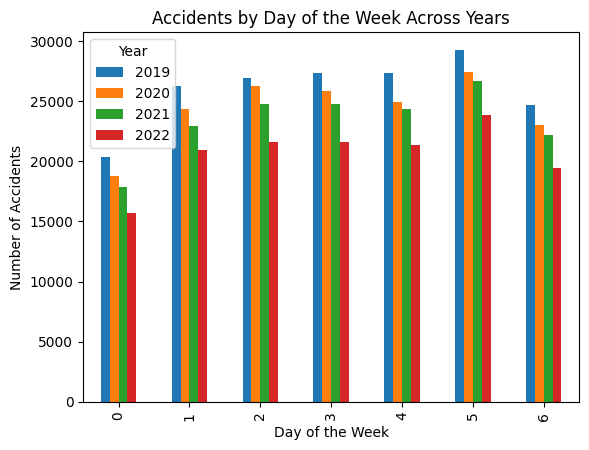

In [38]:
accidents_dow_year = df.groupby(['DayofWeek', 'Year']).size()
accidents_dow_year.unstack().plot(kind='bar')

plt.title("Accidents by Day of the Week Across Years")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.legend(title="Year")
plt.show()


<h2>Insight 1: Sundays are always the lowest, around 12%. For instance, 7,300 Sunday accidents out of 61,500 = 11.9%. This aligns with reduced commuting.</h2>

<h2>Insight 2: Every year comparison shows the pattern stays stable fro Friday is always top, Sunday always lowest, confirming a strong weekly cycle in accident risks. </h2>